In [2]:
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import locale
import numpy as np
from scipy.stats import f_oneway


In [3]:
# Lê o arquivo CSV

df = pd.read_csv('Salaries.csv')

C:\Users\eliton.nachbar\AppData\Local\Temp\ipykernel_5664\1619459927.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


In [4]:
df1 = df.copy()

### EXPLORATORY ANALISYS OF DATA


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [6]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Id: [     1      2      3 ... 148652 148653 148654]
Unique values in EmployeeName: ['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']
Unique values in JobTitle: ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']
Unique values in BasePay: [167411.18 155966.02 212739.13 ... '6.04' '15.50' 'Not Provided']
Unique values in OvertimePay: [0.0 245131.88 106088.18 ... '102.70' '56.77' 'Not Provided']
Unique values in OtherPay: [400184.25 137811.38 16452.6 ... '13.35' 'Not Provided' '-618.13']
Unique values in Benefits: [nan 44430.12 69810.19 ... '0.13' '1.24' 'Not Provided']
Unique values in TotalPay: [ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  6.0000000e+00 -6.1813000e+02]
Unique values in TotalPayBenefits: [ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  7.2400000e+

In [7]:

df1.describe(include="all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148049.0,148654.0,148654.0,112495.0,148654.000000,148654.000000,148654.000000,0.0,148654,38119
unique,NaN,110811,2159,109900.0,66555.0,84968.0,99635.0,NaN,NaN,NaN,NaN,1,2
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,San Francisco,FT
freq,NaN,13,7036,875.0,66103.0,35218.0,1053.0,NaN,NaN,NaN,NaN,148654,22334
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [8]:
missing_percentage = df1.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64


### DROPING ROWS WITH NOT VALUABLE INFOS

In [9]:
df1.drop(columns='EmployeeName',inplace=True)
df1.drop(columns='Status',inplace=True)
df1.drop(columns='Notes',inplace=True)
df1.drop(columns='TotalPayBenefits',inplace=True)

### SETUP JOBTITLE COLUMN FOR UPPER

In [10]:
df1["JobTitle"] = df1["JobTitle"].str.upper()

### CLEANING OF NOT PROVIDED AND NAN ROWS

In [11]:
not_provided_jobs = df1['JobTitle'] == 'NOT PROVIDED'

df1.drop(df1[not_provided_jobs].index, inplace=True)


In [12]:
not_provided_basepay = df1['BasePay'] == 'Not Provided'

df1.drop(df1[not_provided_basepay].index, inplace=True)

In [13]:
df1 = df1.dropna(subset=['BasePay'])

### FILLING COLUMNS WITH NAN FOR ZERO

In [14]:
df1['OvertimePay'].fillna(0, inplace=True)
df1['Benefits'].fillna(0, inplace=True)
df1['OtherPay'].fillna(0, inplace=True)

### TRANSFORMING TYPE OF COLUMNS BASEPAY, OVERTIMEPAY, OTHERPAY AND BENEFITS TO FLOAT

In [15]:
df1['BasePay'] = df1['BasePay'].astype(float)

In [16]:
df1['OvertimePay'] = df1['OvertimePay'].astype(float)

In [17]:
df1['OtherPay'] = df1['OtherPay'].astype(float)

In [18]:
df1['Benefits'] = df1['Benefits'].astype(float)

### CHECKING TYPES OF ROWS

In [19]:
df1.dtypes

Id               int64
JobTitle        object
BasePay        float64
OvertimePay    float64
OtherPay       float64
Benefits       float64
TotalPay       float64
Year             int64
Agency          object
dtype: object

#### One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names,job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

What the average of total pay, overtime pay and benefits by year?

How is the total pay by year and job?

How is the total of overtime pay by year?

How much is the total of benefits by year?

Which job that have gained most overtime pay by year?

What jobs that have gained more benefits by year?

What relative and accumulated percentage of the 20 biggest jobs represent of the total value?

What the most frequent of range pay by year?

What the count of each job?

What the average of payment by job and year?

Which jobs have debts with the government?





In [20]:
###1 What the average of total pay, overtime pay and benefits by year?


def avg_totalpay (df1):

    # Configurando a formatação para moeda dos Estados Unidos (Dólar)
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

    # Seus dados
    avg_totalpay = df1[['TotalPay', 'Year', 'OvertimePay', 'Benefits']].groupby('Year').mean().reset_index()
    avg_totalpay_long = avg_totalpay.melt(id_vars='Year', var_name='Category', value_name='Average')

    # Configuração do gráfico
    plt.figure(figsize=(10, 6))

    # Criando o gráfico de linhas
    ax = sns.lineplot(x='Year', y='Average', hue='Category', data=avg_totalpay_long, palette='viridis', marker='o', sort=False)

    # Removendo linhas de grade
    ax.grid(False)

    # Configurando a fonte
    plt.rcParams['font.family'] = 'Calibri'

    # Configurando o eixo x para mostrar apenas números inteiros
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Adicionando rótulos de dados nos pontos
    for line in ax.lines:
        x_data, y_data = line.get_data()
        for x, y in zip(x_data, y_data):
            ax.annotate(locale.currency(y, grouping=True, symbol=True), 
                        (x, y), 
                        textcoords="offset points",
                        xytext=(0,10), 
                        ha='center')

    # Configurações da legenda
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1, fontsize='small')

    # Configurações adicionais
    plt.title('Average of TotalPay, OvertimePay and Benefits by Year')
    plt.xlabel('Year')
    plt.ylabel('Average')
    plt.show()

c:\Users\eliton.nachbar\AppData\Local\anaconda3\envs\salaries_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eliton.nachbar\AppData\Local\anaconda3\envs\salaries_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


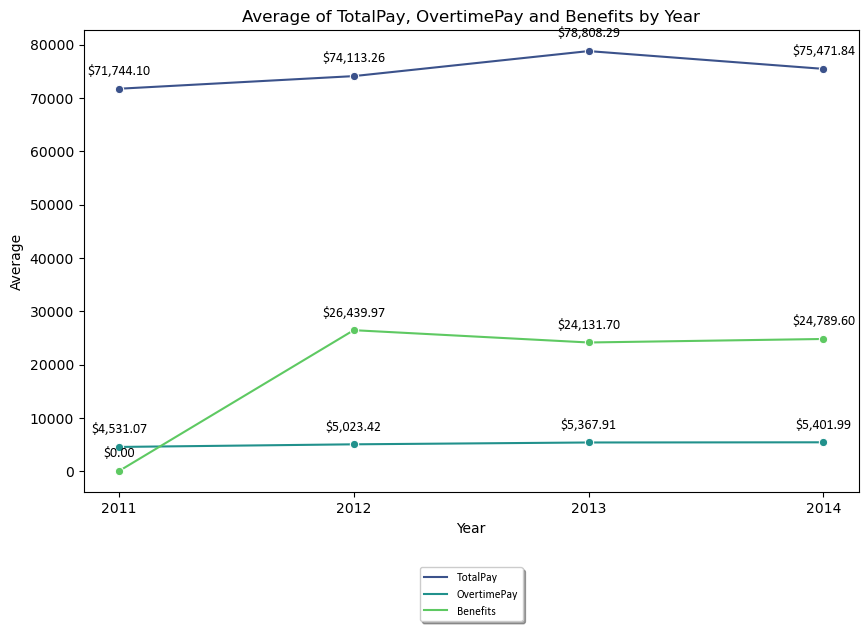

In [21]:
avg_totalpay(df1)

In [22]:
###2. How is the total pay by year and job?

def sum_totalpay(df1):

    df_sum_totalpay = df1[['TotalPay', 'JobTitle', 'Year']].groupby(['Year']).sum().reset_index()

    # Configurando o estilo e o tamanho do gráfico
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Criando o gráfico de barras empilhadas
    ax = sns.barplot(data=df_sum_totalpay, x='Year', y='TotalPay', palette='viridis', width=0.6)

    # Adicionando rótulos de dados nos pontos
    for p in ax.patches:
        ax.annotate(locale.currency(p.get_height(), grouping=True, symbol=True),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                    textcoords='offset points')

    # Configurações do gráfico
    plt.title('Total Pay by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Pay')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

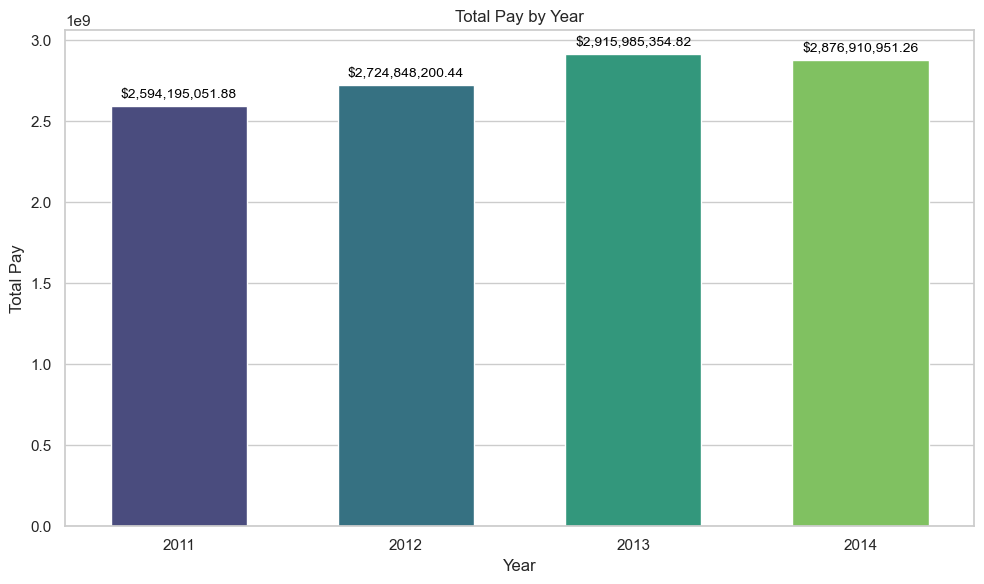

In [23]:
sum_totalpay(df1)

In [24]:
###3. How is the total of overtime pay by year?

def graph_sum ( df1, group_col='Year', value_col='OvertimePay', palette='mako', figsize=(10,6), width=0.4, title='OvertimePay By Year',orient='v'):

  sum_overtime = df1[[group_col,value_col]].groupby(group_col).sum().reset_index()
  plt.figure(figsize=figsize)
  ax = sns.barplot(x=group_col, y=value_col, data=sum_overtime, palette=palette,orient=orient, width=width)
  # Adicionando rótulos de dados nos pontos
  for p in ax.patches:
        ax.annotate(locale.currency(p.get_height(), grouping=True, symbol=True),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                    textcoords='offset points')

  plt.title(title)
  plt.tight_layout()
  plt.show()

  return

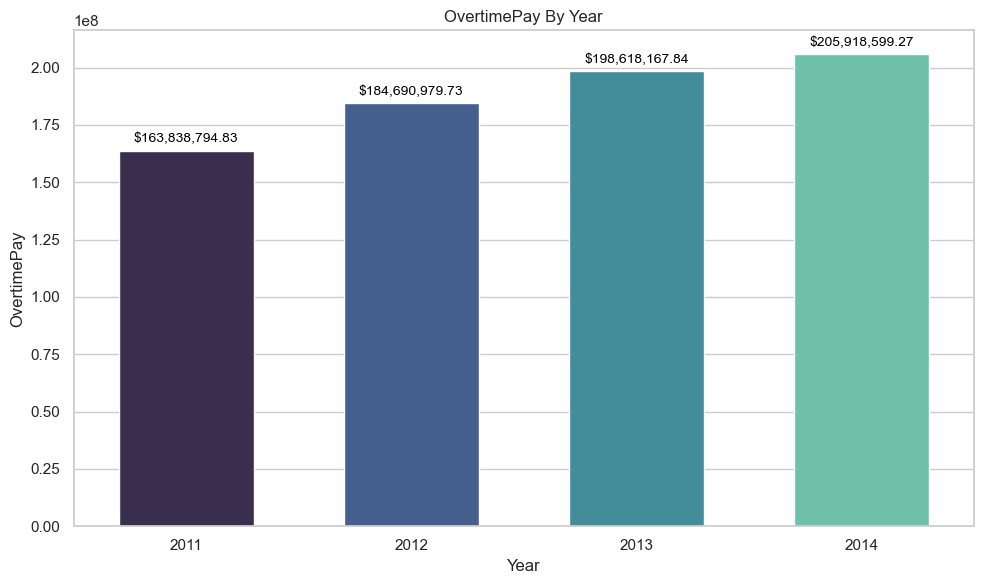

In [25]:
graph_sum(df1, group_col='Year', value_col='OvertimePay', palette='mako', figsize=(10,6), title='OvertimePay By Year',orient='v',width=0.6)

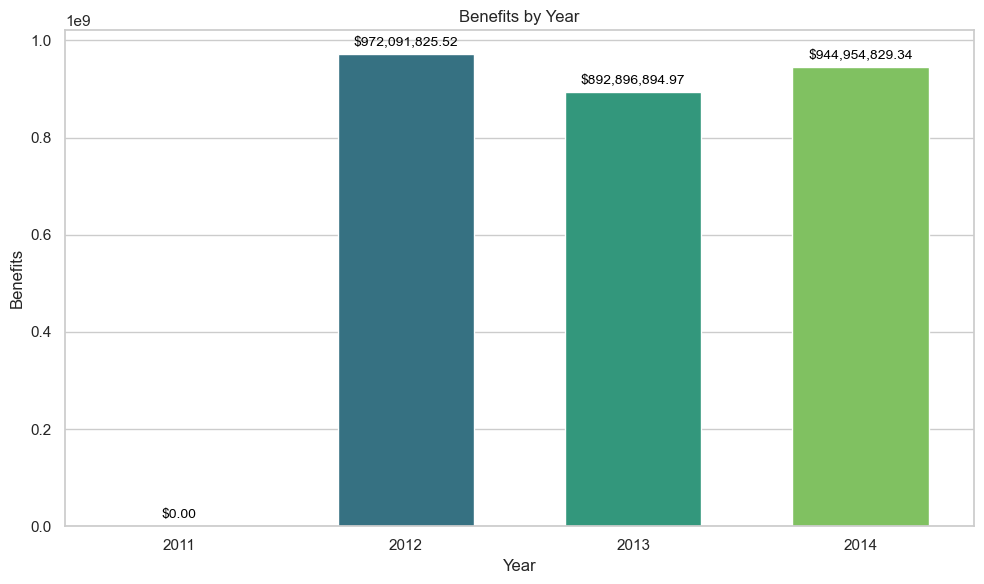

In [26]:
###4 How much is the total of benefits by year?

graph_sum(df1,group_col='Year', value_col='Benefits', palette='viridis', figsize=(10,6), title='Benefits by Year',orient='v',width=0.6)

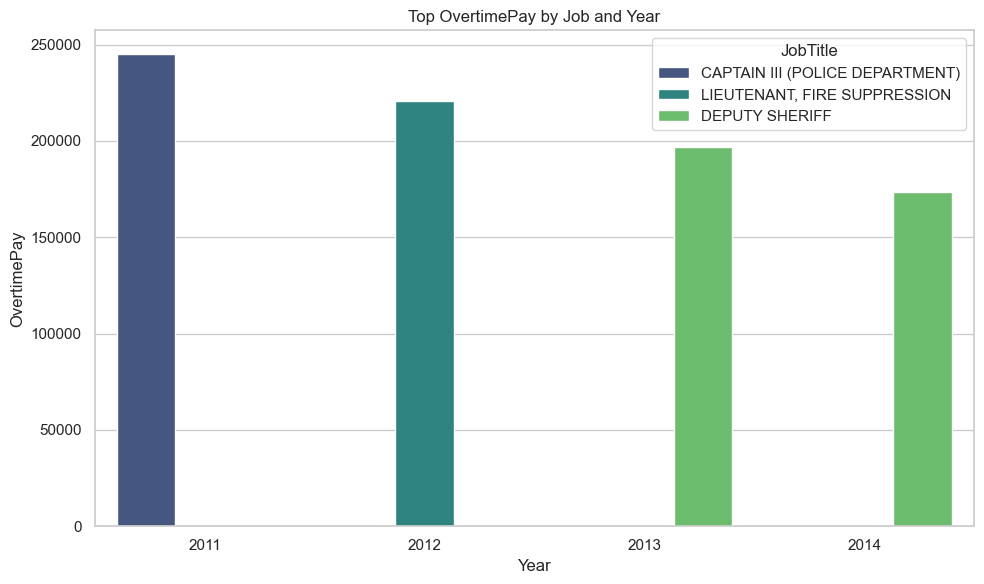

In [27]:
####5. Which job that have gained most overtime pay by year?


# Definindo a localidade para formatação de moeda
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Selecionando os dados
job_overtime = df1.loc[df1.groupby(['Year'])['OvertimePay'].idxmax()][['Year', 'JobTitle', 'OvertimePay']]

# Ordenando os dados por ano
job_overtime = job_overtime.sort_values(by='Year')

# Configurando a figura
plt.figure(figsize=(10 , 6))

# Criando o gráfico de barras empilhadas
sns.barplot(x='Year', y='OvertimePay', hue='JobTitle', data=job_overtime, palette='viridis')

# Configurando o título do gráfico
plt.title('Top OvertimePay by Job and Year')

# Adicionando rótulo ao eixo y
plt.ylabel('OvertimePay')

# Exibindo o gráfico
plt.tight_layout()

plt.show()

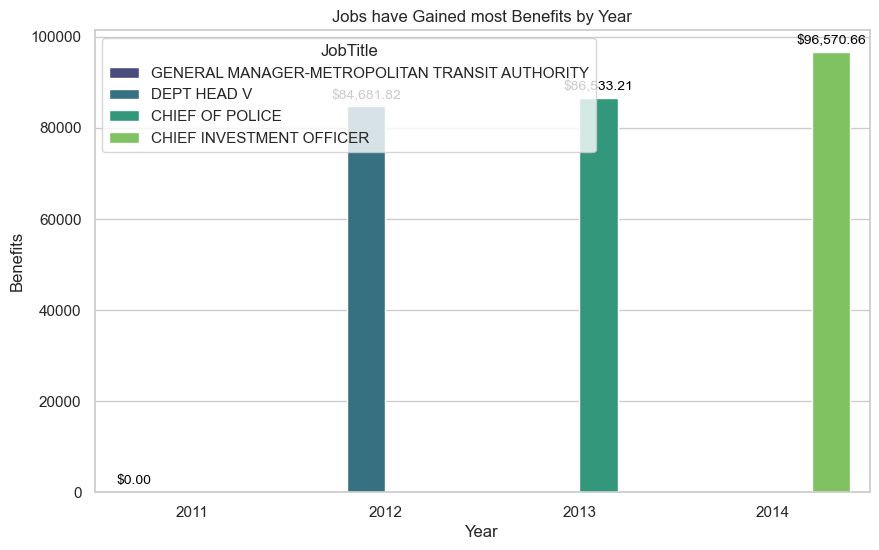

In [28]:
###6. What jobs that have gained more benefits by year?


benefit_year = df1.loc[df1.groupby(['Year'])['Benefits'].idxmax()][['Year', 'JobTitle', 'Benefits']]

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Year', y='Benefits', hue='JobTitle', data=benefit_year, palette='viridis', orient='v', width=0.8)
for p in ax.patches:
        ax.annotate(locale.currency(p.get_height(), grouping=True, symbol=True),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                    textcoords='offset points')
plt.title('Jobs have Gained most Benefits by Year')
plt.show()


In [29]:
###7 What relative and accumulated percentage of the 20 biggest jobs represent of the total value?

percent = df1[['JobTitle', 'TotalPay', 'Year']].groupby('JobTitle')['TotalPay'].sum().reset_index()
percent['Percentage'] = percent['TotalPay'] / percent['TotalPay'].sum() * 100

top_20_percent = percent.nlargest(20, 'Percentage')

top_20_percent['Percentage Accumulated'] = top_20_percent['Percentage'].cumsum()

top_20_percent

,JobTitle,TotalPay,Percentage,Percentage Accumulated
1538,TRANSIT OPERATOR,6.026435e+08,5.423387,5.423387
1192,REGISTERED NURSE,5.622066e+08,5.059483,10.482869
626,FIREFIGHTER,4.546533e+08,4.091574,14.574444
1078,POLICE OFFICER 3,3.263660e+08,2.937075,17.511519
477,DEPUTY SHERIFF,2.769201e+08,2.492095,20.003613
166,ATTORNEY (CIVIL/CRIMINAL),2.036215e+08,1.832457,21.836071
1393,SPECIAL NURSE,1.894610e+08,1.705022,23.541093
1335,SERGEANT 3,1.723525e+08,1.551057,25.092150
1077,POLICE OFFICER 2,1.558021e+08,1.402115,26.494264
431,CUSTODIAN,1.460379e+08,1.314243,27.808508


C:\Users\eliton.nachbar\AppData\Local\Temp\ipykernel_5664\458062268.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_ranges = df1.groupby(['Year', 'Range Payment']).size().reset_index(name='Count')
c:\Users\eliton.nachbar\AppData\Local\anaconda3\envs\salaries_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\eliton.nachbar\AppData\Local\anaconda3\envs\salaries_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

AttributeError: 'numpy.int64' object has no attribute 'startswith'

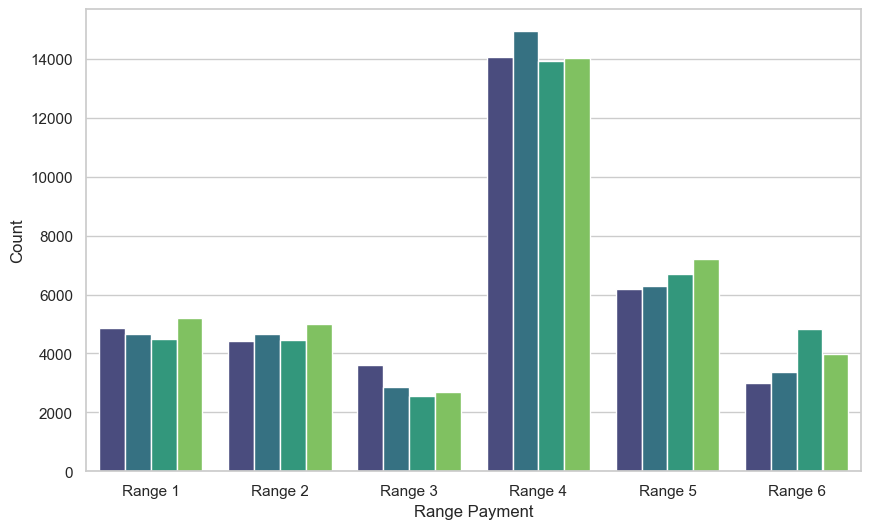

In [30]:
### 8. What the most frequent of range pay by year?

ranges = [0, 10000, 35000, 50000, 90000, 120000, float('inf')]
labels = ['Range 1', 'Range 2', 'Range 3', 'Range 4', 'Range 5', 'Range 6']

df1['Range Payment'] = pd.cut(df1['BasePay'], bins=ranges, labels=labels, right=False)

count_ranges = df1.groupby(['Year', 'Range Payment']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Range Payment', y='Count', hue='Year', data=count_ranges, palette='viridis')

ranges_legend = {
    'Range 1': '< $10,000',
    'Range 2': '$10,000 - $35,000',
    'Range 3': '$35,000 - $50,000',
    'Range 4': '$50,000 - $90,000',
    'Range 5': '$90,000 - $120,000',
    'Range 6': '>= $120,000',
}

plt.title('Count of Total Pay by Range and Year')
plt.xlabel('Range of Total Pay')
plt.ylabel('Count')
plt.xticks(ticks=range(6), labels=[ranges_legend[labels] for labels in count_ranges['Range Payment'].unique()])
plt.legend(title='Year')
plt.tight_layout()

plt.show()

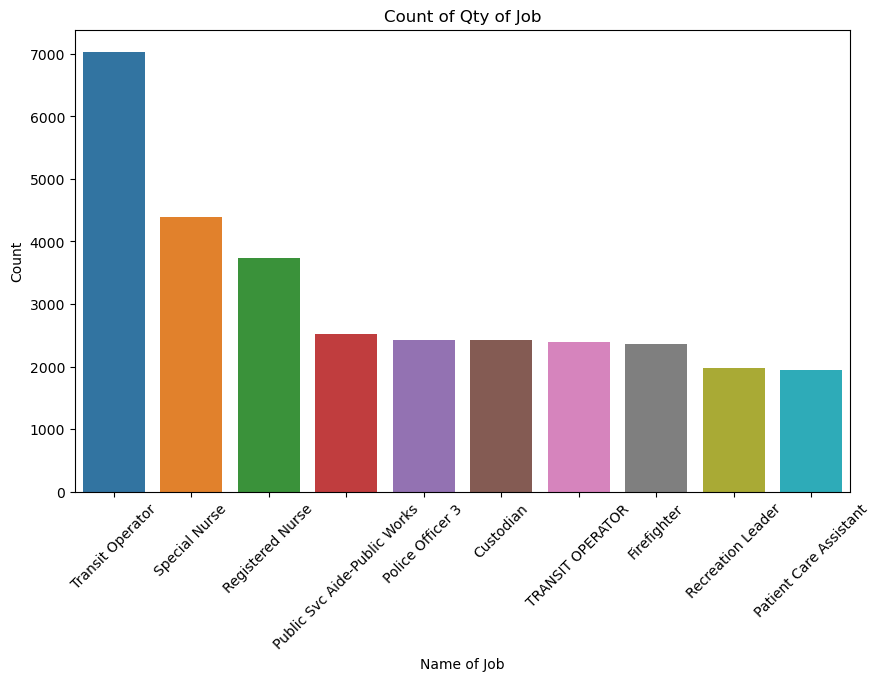

In [ ]:
###9 What the count of each job?

job = df1['JobTitle'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=job.head(10).index,y=job.head(10))
plt.xlabel('Name of Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Count of Qty of Job')
plt.show()


In [ ]:
###10 What the average of payment by job and year?

avg_job_year= df1[['JobTitle','BasePay','Year']].groupby(['JobTitle','Year']).mean().sort_values('Year', ascending=False).reset_index()

avg_job_year.head(10)

,JobTitle,Year,BasePay
0,SUPERVISING PURCHASER,2014,105906.557500
1,IS BUSINESS ANALYST-SENIOR,2014,91842.225000
2,ELECTRICAL INSPECTOR,2014,88837.571538
3,ORNAMENTAL IRON WORKER,2014,77888.986000
4,IS BUSINESS ANALYST-ASSISTANT,2014,68017.973333
5,CHIEF PLUMBING INSPECTOR,2014,132690.080000
6,"OPERATING ENGINEER, UNIVERSAL",2014,81861.796136
7,THERAPY AIDE,2014,69444.589091
8,CHIEF PREPARATOR,2014,35520.885000
9,TREASURER,2014,175202.730000


In [ ]:
###11 Which jobs have debts with the government?

count_zero= df1.loc[:,'TotalPay'] < 0

df1.loc[count_zero, ['JobTitle','TotalPay','Year']].groupby(['JobTitle','Year']).min().sort_values('TotalPay',ascending=True).reset_index()




,JobTitle,Year,TotalPay
0,"COUNSELOR, LOG CABIN RANCH",2014,-618.13


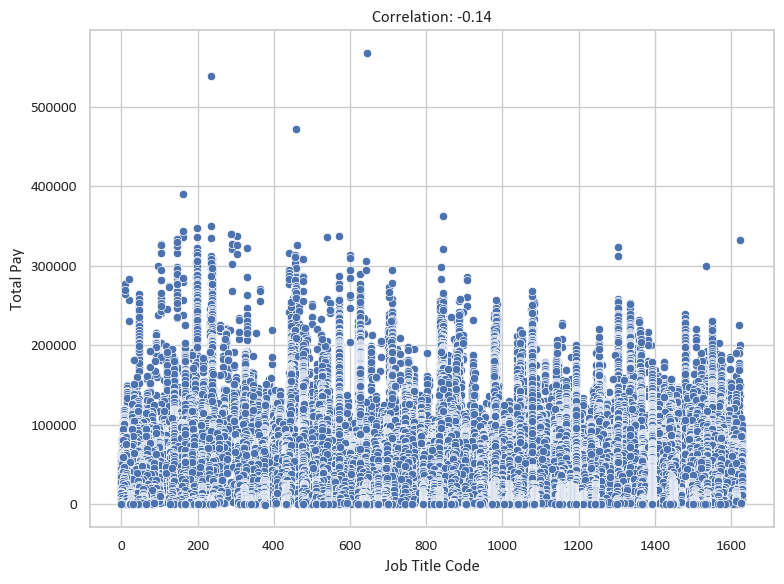

In [ ]:
# Converter a coluna "JobTitle" em códigos numéricos
df1['JobTitleCode'] = df1['JobTitle'].astype('category').cat.codes

# Calcular a correlação entre "JobTitleCode" e "TotalPay"
correlation = df1['JobTitleCode'].corr(df1['TotalPay'])

# Plotar um gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JobTitleCode', y='TotalPay', data=df1)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Job Title Code')
plt.ylabel('Total Pay')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupar os dados pelo 'jobtitle'
grupos = [grupo[1]['TotalPay'].values for grupo in df1.groupby('JobTitle')]

# Realizar o teste ANOVA
resultado_anova = f_oneway(*grupos)

# Imprimir o resultado
print("Estatística F:", resultado_anova.statistic)
print("Valor-p:", resultado_anova.pvalue)


Estatística F: 201.5664957957218
Valor-p: 0.0


In [40]:
job_over = df1.groupby('JobTitle').max().reset_index()
job_over = job_over.sort_values(by='OvertimePay', ascending=False)

job_over

,JobTitle,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency,Range Payment
235,CAPTAIN III (POLICE DEPARTMENT),11199,215914.03,245131.88,137811.38,0.00,538909.28,2011,San Francisco,Range 6
844,"LIEUTENANT, FIRE SUPPRESSION",142753,200404.00,220909.48,108658.85,64186.78,362844.66,2014,San Francisco,Range 6
477,DEPUTY SHERIFF,148490,95274.92,196689.18,44134.45,40058.56,308434.84,2014,San Francisco,Range 5
570,EMT/PARAMEDIC/FIREFIGHTER,143812,154575.10,192424.49,73405.19,50505.92,337204.86,2014,San Francisco,Range 6
626,FIREFIGHTER,148210,139171.03,160418.47,107250.51,51296.28,290076.13,2014,San Francisco,Range 6
...,...,...,...,...,...,...,...,...,...,...
734,IS ADMINISTRATOR 3,120534,104274.79,0.00,25299.63,40108.83,122760.66,2014,San Francisco,Range 5
737,IS ADMINISTRATOR III,34915,99962.70,0.00,23694.17,0.00,118897.20,2011,San Francisco,Range 5
738,IS ADMINISTRATOR-SUPERVISOR,128762,113144.86,0.00,21290.00,41468.93,116169.84,2014,San Francisco,Range 5
740,IS BUSINESS ANALYST - ASSISTANT,25703,74645.85,0.00,1562.02,0.00,75680.80,2011,San Francisco,Range 4


In [43]:
max_overtime_per_year_info = df1.loc[df1.groupby('Year')['OvertimePay'].idxmax(), ['Year', 'JobTitle', 'OvertimePay']]
print(max_overtime_per_year_info)

        Year                         JobTitle  OvertimePay
1       2011  CAPTAIN III (POLICE DEPARTMENT)    245131.88
36159   2012     LIEUTENANT, FIRE SUPPRESSION    220909.48
72964   2013                   DEPUTY SHERIFF    196689.18
110574  2014                   DEPUTY SHERIFF    173547.73
